In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append("/home/cgarcia_2002/nHits_count")

import functions_nHits  # Importa la función que necesitas
import importlib
import functions_spills

importlib.reload(functions_nHits)
importlib.reload(functions_spills)



<module 'functions_spills' from '/home/cgarcia_2002/nHits_count/functions_spills.py'>

In [2]:

root_file_path = "/data/cgarcia_2002/WCTE/data/2385_calib_time/WCTE_offline_R2385S0P0.root"  #signal

# Open the ROOT file and get the TTree
file = uproot.open(root_file_path)

tree_sig = file["WCTEReadoutWindows"]  


#DOWNLOAD INFO OF THE TREE
times_branch = tree_sig["hit_pmt_calibrated_times"].array(library="np")
charge_branch = tree_sig["hit_pmt_charges"].array(library="np")
event_number_branch_sig = tree_sig["event_number"].array(library="np")

mpmt_id_branch = tree_sig["hit_mpmt_card_ids"].array(library="np")

times_branch_sorted = []
charge_branch_sorted = []
mpmt_id_branch_sorted = []

for times_evt, charges_evt, mpmt_evt in zip(times_branch, charge_branch, mpmt_id_branch):
    idx_sorted = np.argsort(times_evt)  # índice de orden
    times_branch_sorted.append(times_evt[idx_sorted])
    charge_branch_sorted.append(charges_evt[idx_sorted])
    mpmt_id_branch_sorted.append(mpmt_evt[idx_sorted])


In [ ]:
times_FilterSpills_nHits, charge_FilterSpills_ChargeTT, spills_list = functions_spills.repeat_spills_Charge(event_number_branch_sig, times_branch_sorted, charge_branch_sorted)
#times_FilterSpills_nHits, spills_list2 = functions_spills.repeat_spills_nHits(event_number_branch_sig, times_branch_sorted)


Event 84: spill_ChargeTT applied 2 times
Event 89: spill_ChargeTT applied 2 times
Event 103: spill_ChargeTT applied 2 times
Event 277: spill_ChargeTT applied 2 times
Event 323: spill_ChargeTT applied 2 times
Event 533: spill_ChargeTT applied 2 times
Event 846: spill_ChargeTT applied 2 times
Event 1093: spill_ChargeTT applied 2 times


In [ ]:
########################################## bkg download info
root_file_path = "/data/cgarcia_2002/WCTE/data/2384_calib_time/WCTE_offline_R2384S0P0.root" #bkg

# Open the ROOT file and get the TTree
file = uproot.open(root_file_path)

tree_bkg = file["WCTEReadoutWindows"]  

#DOWNLOAD INFO OF THE TREE
times_branch = tree_bkg["hit_pmt_calibrated_times"].array(library="np")
charge_branch = tree_bkg["hit_pmt_charges"].array(library="np")
event_number_branch_bkg = tree_bkg["event_number"].array(library="np")

mpmt_id_branch = tree_bkg["hit_mpmt_card_ids"].array(library="np")

times_branch_sorted = []
charge_branch_sorted = []
mpmt_id_branch_sorted = []

for times_evt, charges_evt, mpmt_evt in zip(times_branch, charge_branch, mpmt_id_branch):
    idx_sorted = np.argsort(times_evt)  # índice de orden
    times_branch_sorted.append(times_evt[idx_sorted])
    charge_branch_sorted.append(charges_evt[idx_sorted])
    mpmt_id_branch_sorted.append(mpmt_evt[idx_sorted])

In [ ]:

times_FilterSpills_nHits_bkg, charge_FilterSpills_ChargeTT_bkg, spills_list_bkg = functions_spills.repeat_spills_Charge(event_number_branch_bkg, times_branch_sorted, charge_branch_sorted)
#times_FilterSpills_nHits_bkg, spills_list2_bkg = functions_spills.repeat_spills_nHits(event_number_branch_bkg, times_branch_sorted)


Event 161: spill_ChargeTT applied 2 times
Event 670: spill_ChargeTT applied 2 times
Event 777: spill_ChargeTT applied 2 times
Event 836: spill_ChargeTT applied 2 times
Event 1400: spill_ChargeTT applied 2 times
Event 1446: spill_ChargeTT applied 2 times


In [ ]:
###################################
bin_hits = 4000  #dividing windows along 270000 ns
times_array = np.arange(0, 270000+1, bin_hits, dtype=int)

nHits_bkg = np.zeros((tree_bkg.num_entries, len(times_array)))
nHits_sig = np.zeros((tree_sig.num_entries, len(times_array)))

for times, event_number in zip(times_FilterSpills_nHits, event_number_branch_sig):

    nHits_sig[event_number, :] = functions_nHits.count_nHits(times, bin_hits, nHits_sig[event_number, :])


for times, event_number in zip(times_FilterSpills_nHits_bkg, event_number_branch_bkg):

    nHits_bkg[event_number, :] = functions_nHits.count_nHits(times, bin_hits, nHits_bkg[event_number, :])


In [ ]:

for times, event_number in zip(times_FilterSpills_nHits_bkg, event_number_branch_bkg):

    nHits_bkg[event_number, :] = functions_nHits.count_nHits(times, bin_hits, nHits_bkg[event_number, :])


In [7]:

##################################

bin_hist = 50

hist_nHits_sig = np.zeros(int(5000/bin_hist))
hist_nHits_bkg = np.zeros(int(5000/bin_hist))


for event in event_number_branch_sig:
    hist_nHits_sig = functions_nHits.count_nHits(nHits_sig[event, :], bin_hist, hist_nHits_sig)

for event in event_number_branch_bkg:
    hist_nHits_bkg = functions_nHits.count_nHits(nHits_bkg[event, :], bin_hist, hist_nHits_bkg)


(0.0, 500.0)

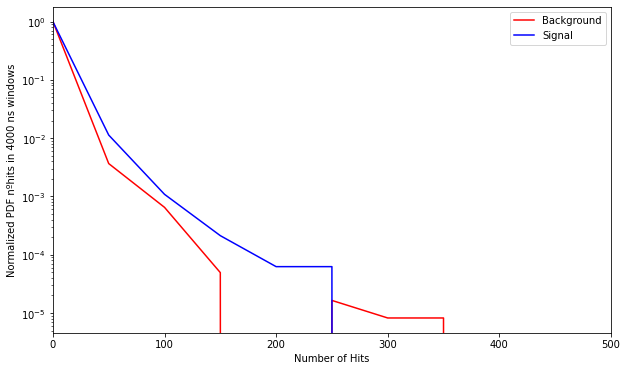

In [8]:

##########################

plt.figure(figsize=(10, 6))
plt.plot(np.arange(0, 5000, bin_hist), hist_nHits_bkg/(len(times_FilterSpills_nHits_bkg)*(270000/bin_hits)), label='Background', color='red')
plt.plot(np.arange(0, 5000, bin_hist), hist_nHits_sig/(len(times_FilterSpills_nHits)*(270000/bin_hits)), label='Signal', color='blue')
plt.xlabel('Number of Hits')
plt.ylabel(f'Normalized PDF nºhits in {bin_hits} ns windows')
plt.legend()
plt.yscale('log')
plt.xlim(0, 500)
